In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
# Checking the directory 
os.getcwd()

# Set new directory
os.chdir("C:\\Users\\skv96\\OneDrive\\Desktop\\Study_Mat\\PRJ Stock Price Prediction")

data = pd.read_csv("prices.csv", header=0)

data.head(10)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [4]:
data['symbol'].value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [5]:
data['symbol'].value_counts().head(10)

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
O       1762
NWL     1762
NVDA    1762
NUE     1762
NTRS    1762
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [7]:
data.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [9]:
data.shape

(851264, 7)

In [10]:
data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [11]:
data['symbol'].nunique()

501

In [12]:
data['symbol'].unique().shape

(501,)

In [13]:
data.symbol.values

array(['WLTW', 'WLTW', 'WLTW', ..., 'ZTS', 'AIV', 'FTV'], dtype=object)

In [14]:
len(data.symbol.values)

851264

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [17]:
data.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
# Calling the file in nyse named securities.csv, It has the company details
comp_info = pd.read_csv("securities.csv")

In [20]:
comp_info.head(10)

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
5,AYI,Acuity Brands Inc,reports,Industrials,Electrical Components & Equipment,"Atlanta, Georgia",03-05-2016,1144215
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",05-05-1997,796343
7,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",09-07-2015,1158449
8,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",NaN,874761
9,AET,Aetna Inc,reports,Health Care,Managed Health Care,"Hartford, Connecticut",30-06-1976,1122304


In [22]:
comp_info.shape

(505, 8)

In [23]:
comp_info["Ticker symbol"].nunique()

505

In [24]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [25]:
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [26]:
comp_info.describe()


,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [27]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group'), ["Ticker symbol"] ]["Ticker symbol"] 


In [28]:
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [29]:
for i in comp_plot:
    print(i)


ADBE
FB
GS
MSFT
XRX
YHOO


In [30]:
# Create a function to plot Graphs for selected companies opening stock and closing stock against time 
def plotter(code):
    global closing_stock, opening_stock
    f, axs = plt.subplots(2, 2, figsize=(15, 8))
    plt.subplot(212)
    company = data[data['symbol'] == code]
    company = company.open.values.astype('float32')
    company = company.reshape(-1, 1)
    opening_stock = company
    
    plt.grid(True)
    plt.xlabel('Time') 
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time')
    plt.plot(company, 'g') 
    plt.subplot(211)
    company_close = data[data['symbol'] == code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time') 
    plt.grid(True) 
    plt.plot(company_close, 'b')
    plt.show()

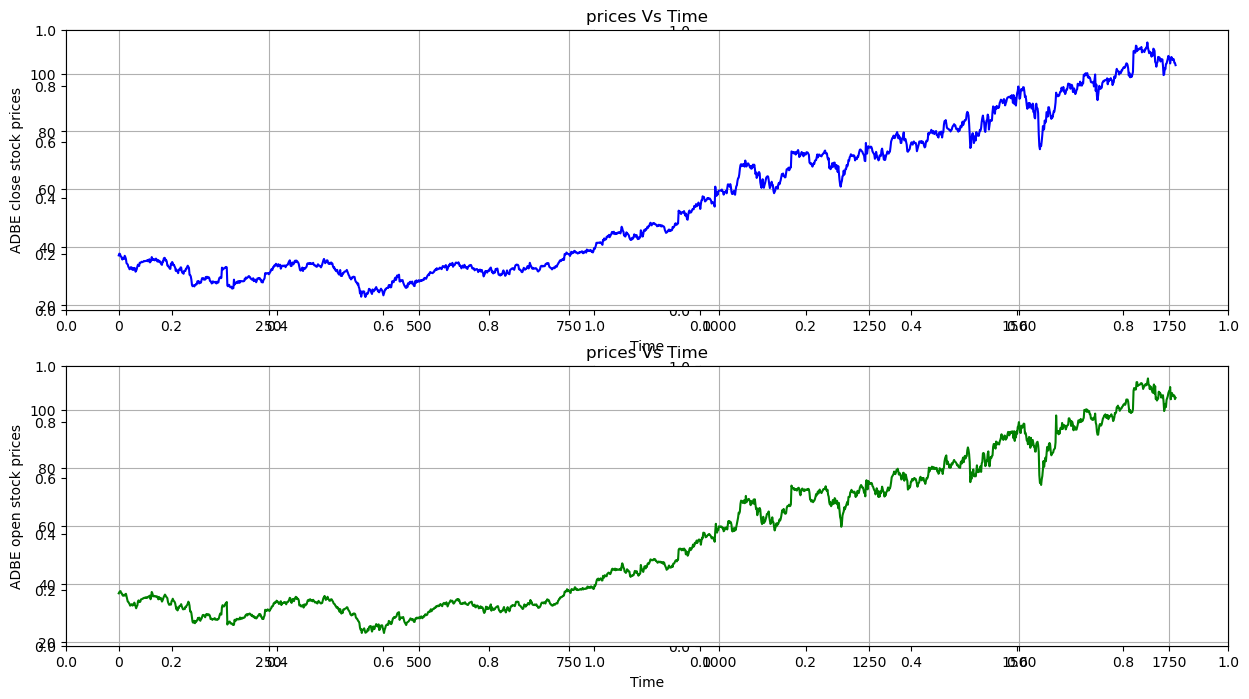

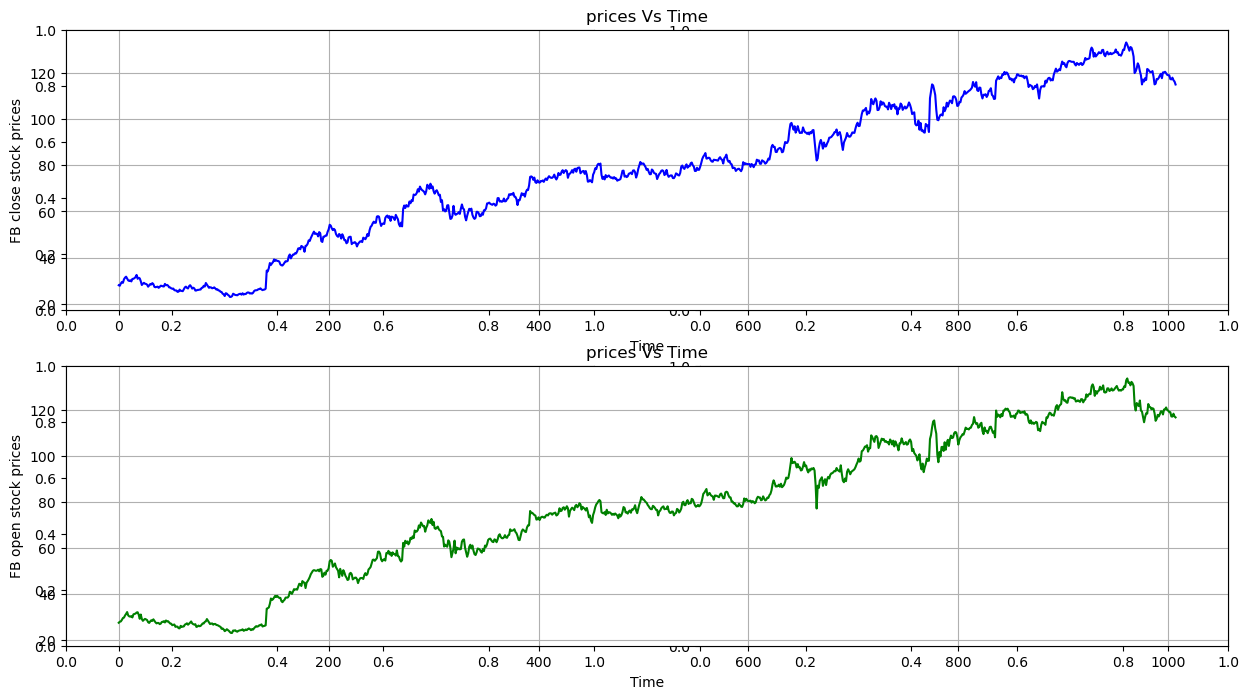

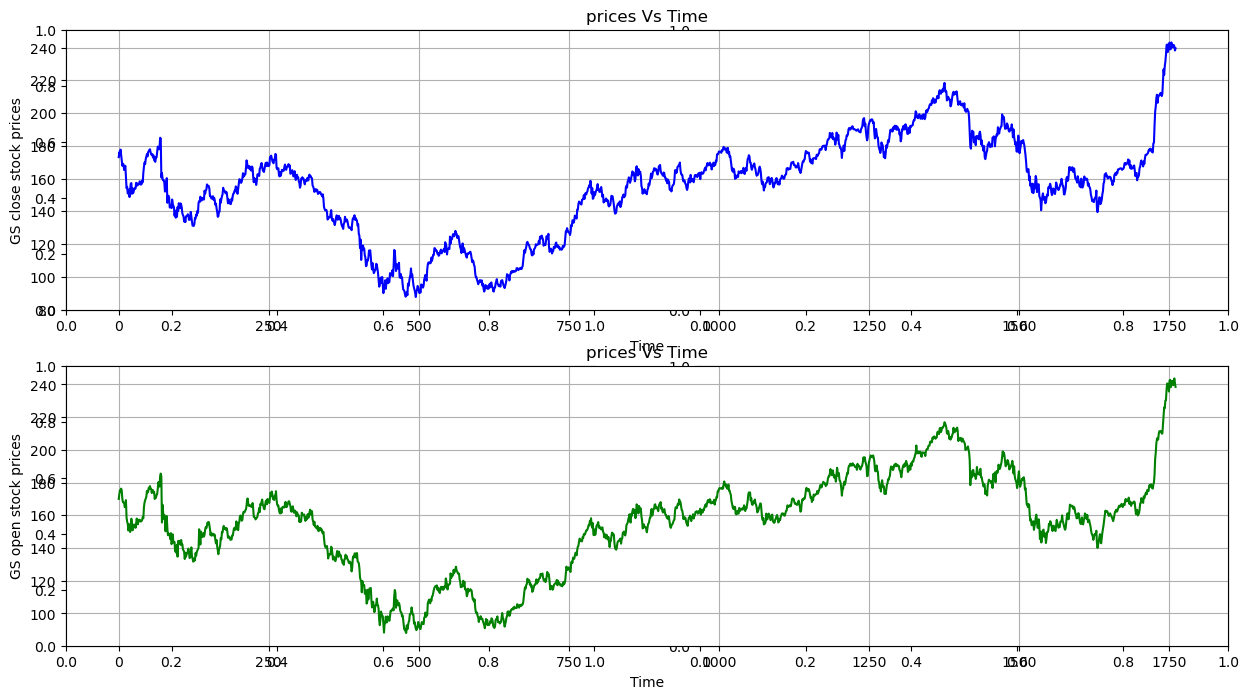

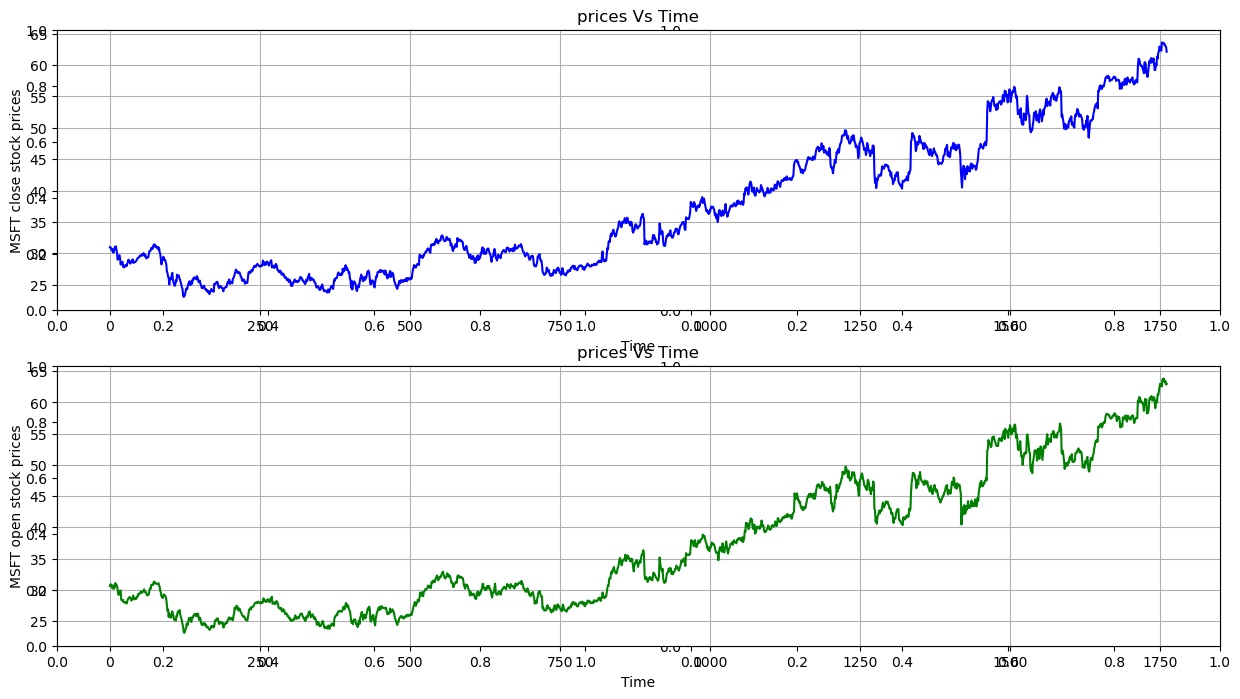

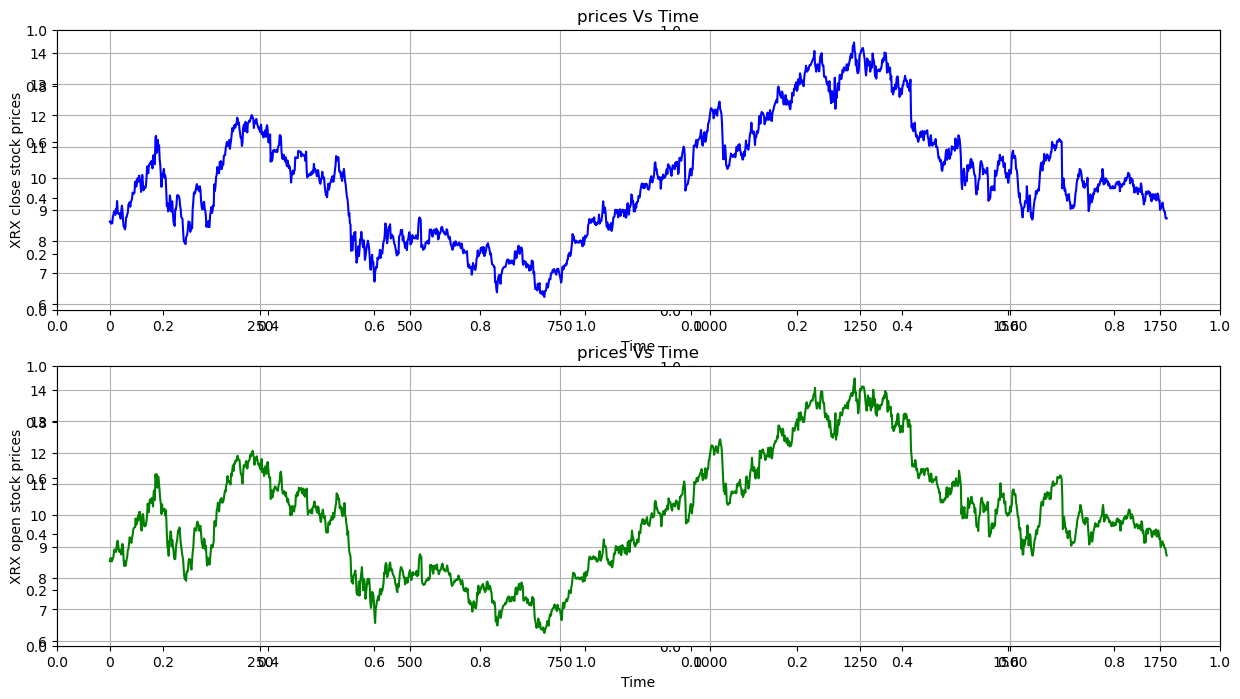

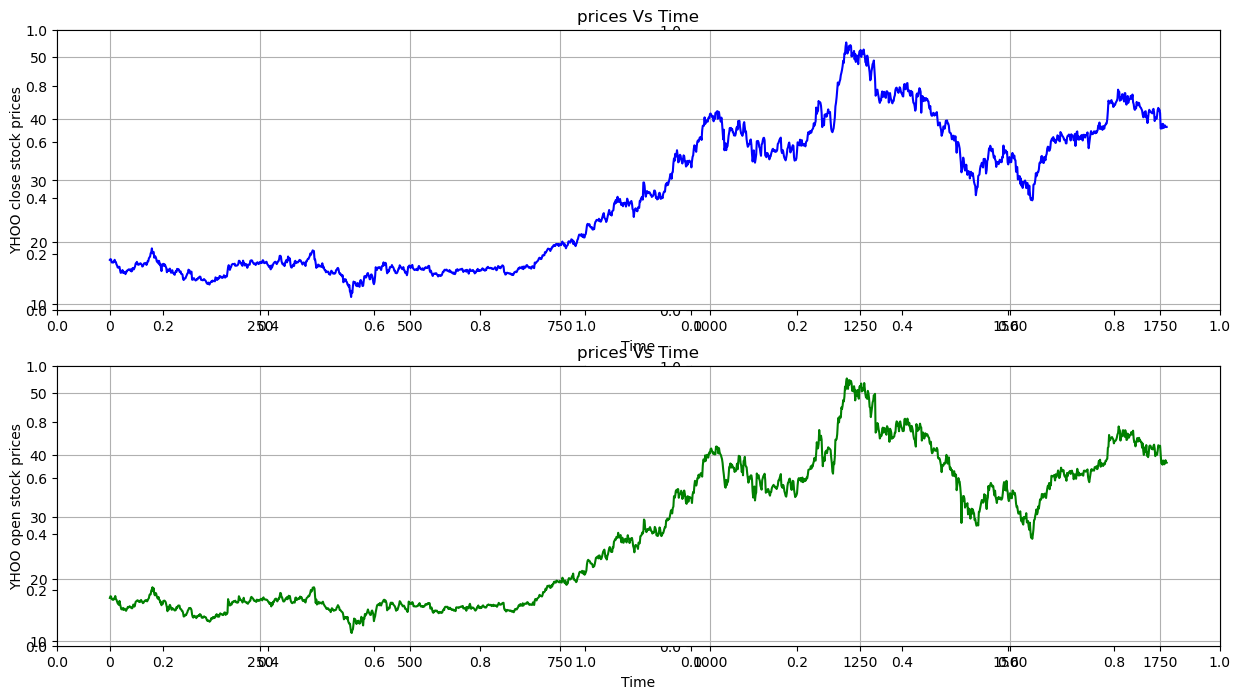

In [31]:
# Calling the graphs through the function    
for i in comp_plot:
    plotter(i)

In [32]:
stocks = np.array(data[data.symbol.isin(['XRX'])].close)
print(stocks)

stocks.shape

[8.63 8.64 8.56 ... 8.76 8.72 8.73]


(1762,)

In [33]:
# Convert stock to 2D array   
stocks = stocks.reshape(len(stocks), 1)
stocks.shape


(1762, 1)

In [34]:
display(stocks)

array([[8.63],
       [8.64],
       [8.56],
       ...,
       [8.76],
       [8.72],
       [8.73]])

In [35]:
# Min Max Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_stocks = scaler.fit_transform(stocks)
display(scaled_stocks)

array([[0.29666255],
       [0.29789864],
       [0.28800989],
       ...,
       [0.31273177],
       [0.30778739],
       [0.30902349]])

In [36]:
# Train Test Split (80 % Training and 20 % Test Data)

train_size = int(len(stocks) * 0.80)
test_size = len(stocks) - train_size


In [37]:
print("Total records:", stocks.shape[0])
print("Training records:", train_size)
print("Test records:", test_size)

train_data = scaled_stocks[:train_size]
test_data = scaled_stocks[train_size:]

Total records: 1762
Training records: 1409
Test records: 353


In [38]:
print("Training data shape:", train_data.shape)
print(train_data)
print("Test data shape:", test_data.shape)
print(test_data)

Training data shape: (1409, 1)
[[0.29666255]
 [0.29789864]
 [0.28800989]
 ...
 [0.58838072]
 [0.58590853]
 [0.57478368]]
Test data shape: (353, 1)
[[0.62299135]
 [0.59950556]
 [0.5908529 ]
 [0.58343634]
 [0.59579728]
 [0.63535229]
 [0.62917182]
 [0.61928307]
 [0.59332509]
 [0.5512979 ]
 [0.45735476]
 [0.42398022]
 [0.46106304]
 [0.49443758]
 [0.50432633]
 [0.48702101]
 [0.43881335]
 [0.46229913]
 [0.4684796 ]
 [0.45488257]
 [0.51792336]
 [0.49443758]
 [0.50432633]
 [0.51915946]
 [0.50556242]
 [0.53770087]
 [0.54264524]
 [0.53770087]
 [0.5092707 ]
 [0.52904821]
 [0.50679852]
 [0.48825711]
 [0.47836836]
 [0.47589617]
 [0.42150803]
 [0.40296663]
 [0.43263288]
 [0.42150803]
 [0.44746601]
 [0.46229913]
 [0.46353523]
 [0.5092707 ]
 [0.5315204 ]
 [0.53399258]
 [0.52286774]
 [0.51668727]
 [0.48207664]
 [0.50309023]
 [0.4907293 ]
 [0.4894932 ]
 [0.49443758]
 [0.48578492]
 [0.50185414]
 [0.50803461]
 [0.4697157 ]
 [0.37824475]
 [0.3868974 ]
 [0.38442522]
 [0.39060569]
 [0.4276885 ]
 [0.43386897]

In [39]:
def process_data(dat, n_features):
    dataX, dataY = [], []
    for i in range(len(dat) - n_features):
        dataX.append(dat[i:(i + n_features), 0])
        dataY.append(dat[i + n_features])
    return np.array(dataX), np.array(dataY)

In [40]:
# use two previous records data to predict the current value. so n_features values taken 2
n_features = 2

trainX, trainY = process_data(train_data, n_features)
print(trainX.shape, trainY.shape)

(1407, 2) (1407, 1)


In [41]:
testX, testY = process_data(test_data, n_features)
print(testX.shape, testY.shape)


(351, 2) (351, 1)


In [42]:
stocksX, stocksY = process_data(scaled_stocks, n_features)
print(stocksX.shape, stocksY.shape)

(1760, 2) (1760, 1)


In [43]:
display(trainX[:10])

array([[0.29666255, 0.29789864],
       [0.29789864, 0.28800989],
       [0.28800989, 0.29295426],
       [0.29295426, 0.28924598],
       [0.28924598, 0.31520396],
       [0.31520396, 0.32385661],
       [0.32385661, 0.33621755],
       [0.33621755, 0.32880099],
       [0.32880099, 0.32262052],
       [0.32262052, 0.34487021]])

In [44]:
display(testY[:10])


array([[0.5908529 ],
       [0.58343634],
       [0.59579728],
       [0.63535229],
       [0.62917182],
       [0.61928307],
       [0.59332509],
       [0.5512979 ],
       [0.45735476],
       [0.42398022]])

In [45]:
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
display(trainX.shape)

(1407, 1, 2)

In [46]:
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])
display(testX.shape)

(351, 1, 2)

In [47]:
stocksX = stocksX.reshape(stocksX.shape[0], 1, stocksX.shape[1])
display(stocksX.shape)

(1760, 1, 2)

In [48]:
import math 
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation 
from keras.layers import LSTM, GRU 
from sklearn.metrics import mean_squared_error 
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [49]:
# Create Check Points 
filepath="stock_weights1.keras"


In [50]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')


In [51]:
model = Sequential()
model.add(GRU(256, input_shape=(1, n_features), return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 256)              │         199,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741,505 (2.83 MB)

 Trainable params: 741,505 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

None


In [52]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0005), metrics=['mean_squared_error'])

In [54]:
history = model.fit(trainX, trainY, epochs=100, batch_size=128, 
          callbacks=[checkpoint, lr_reduce], validation_data=(testX, testY))

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2407 - mean_squared_error: 0.2407
Epoch 1: val_loss improved from -inf to 0.07604, saving model to stock_weights1.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.2381 - mean_squared_error: 0.2381 - val_loss: 0.0760 - val_mean_squared_error: 0.0760 - learning_rate: 5.0000e-04
Epoch 2/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 2: val_loss did not improve from 0.07604
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0816 - mean_squared_error: 0.0816 - val_loss: 0.0091 - val_mean_squared_error: 0.0091 - learning_rate: 5.0000e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 3: val_loss did not improve from 0.07604
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0038 - val_mean_squared_error: 0.0038 - learning_rate: 5.0000e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 

In [55]:
test_pred = model.predict(testX)
display(test_pred[:10])

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


array([[0.61681384],
       [0.6035875 ],
       [0.59702307],
       [0.59891766],
       [0.61996275],
       [0.63392526],
       [0.62735915],
       [0.6127845 ],
       [0.5851481 ],
       [0.5303709 ]], dtype=float32)

In [56]:
test_pred = test_pred.reshape(-1, 1)
test_pred.shape

(351, 1)

In [57]:
# Inverse Transform the data – Convert the data to Original form
test_pred = scaler.inverse_transform(test_pred)
display(test_pred[:10])

array([[11.220023 ],
       [11.113023 ],
       [11.0599165],
       [11.075243 ],
       [11.245499 ],
       [11.358455 ],
       [11.305336 ],
       [11.187427 ],
       [10.963848 ],
       [10.5207   ]], dtype=float32)

In [58]:
testY = testY.reshape(testY.shape[0] , 1)

In [59]:
testY = scaler.inverse_transform(testY)

In [60]:
display (testY[:10])

array([[11.01],
       [10.95],
       [11.05],
       [11.37],
       [11.32],
       [11.24],
       [11.03],
       [10.69],
       [ 9.93],
       [ 9.66]])

In [61]:
#Display the accuracy 

from sklearn.metrics import r2_score
r2_score(testY,test_pred)

0.5784152876671423

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


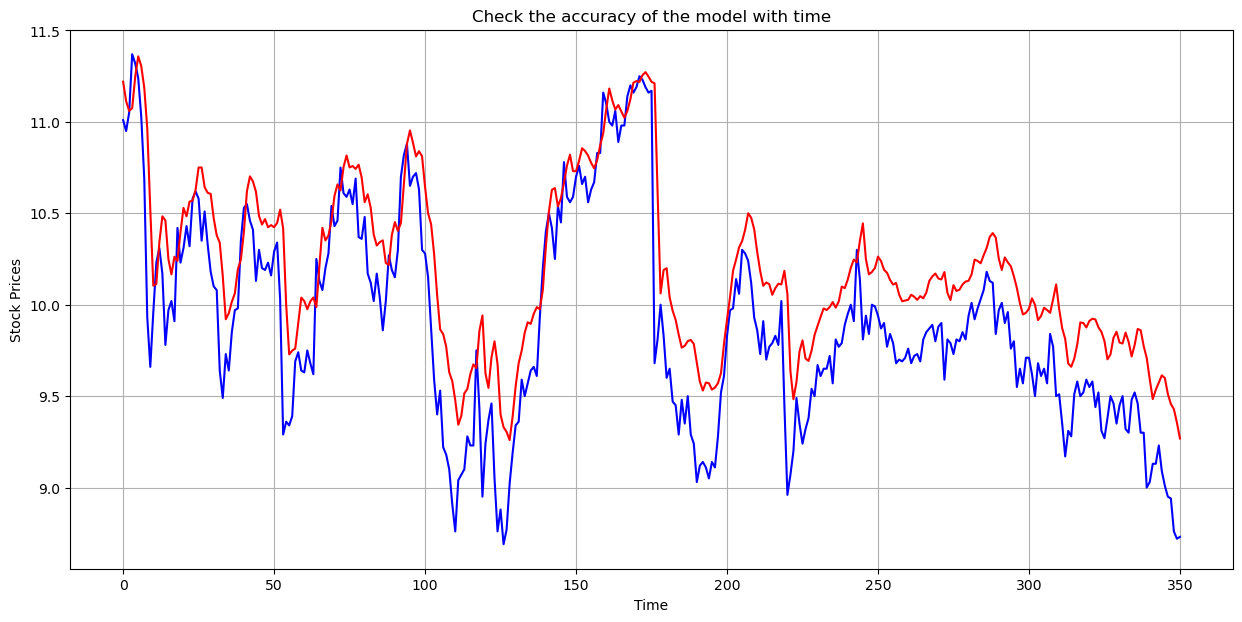

In [65]:
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()


In [67]:
#Prediction Training Data and Check Accuracy

train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Display Accuracy Training Data


0.9326025124351469

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


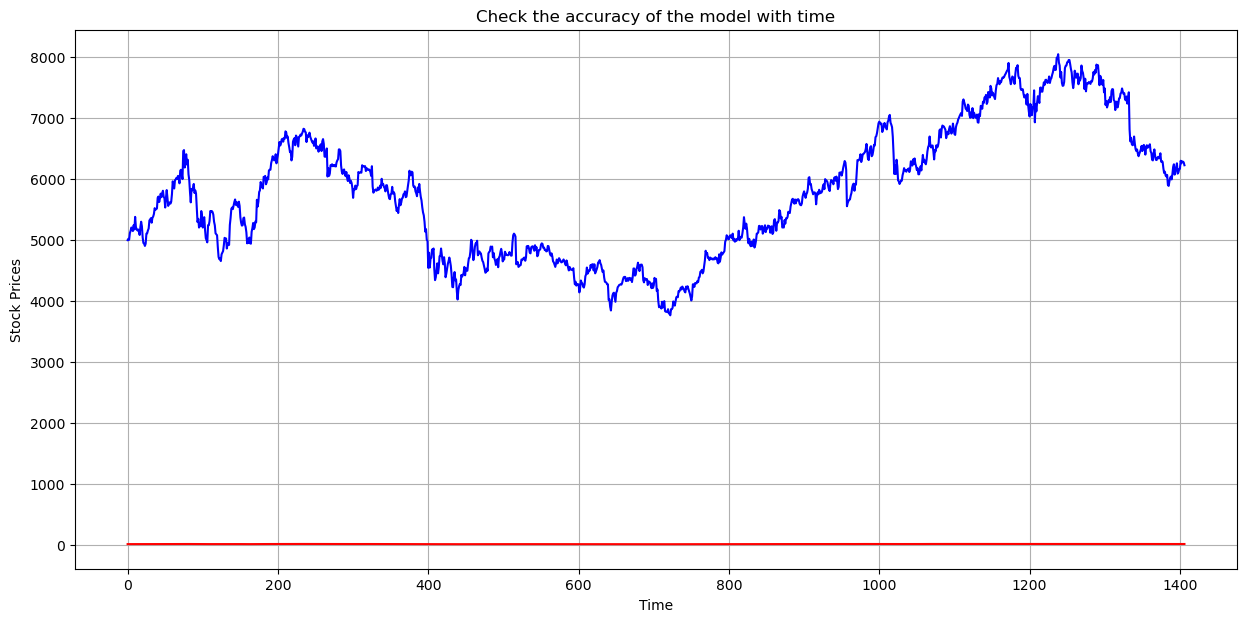

In [71]:
# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [73]:
#Predict full data

stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Display Accuracy Training Data


0.9256164307139942

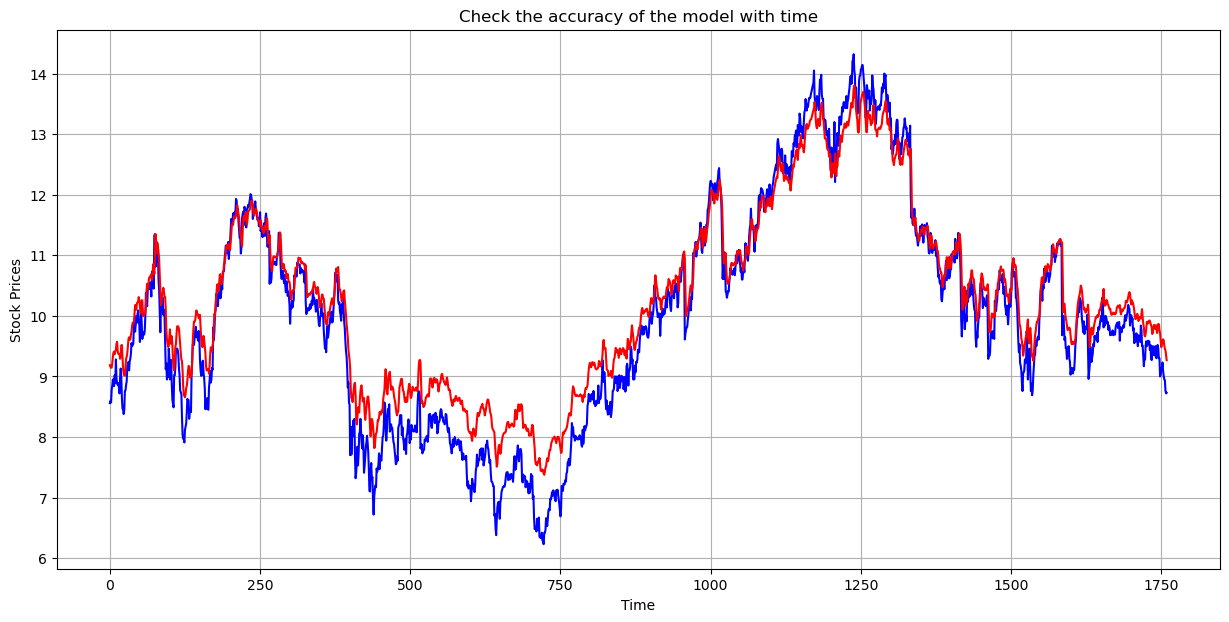

In [74]:
#Plot the Graph 

plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()



# Concat original and prediction data  

In [76]:
# Extract the data related to company - YHOO
results= data[data.symbol.isin (['YHOO'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_csv('results.csv')
display(results)


,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,9.185668
1,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,9.158831
2,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,9.142558
3,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0,9.146837
4,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0,9.215796
...,...,...,...,...,...,...,...,...
1755,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0,9.511969
1756,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0,9.456720
1757,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0,9.428890
1758,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0,9.355221
